# Gradient Boosting Algorithms

Gradient Boosting is an supervised machine learning algorithm used for classification and regression problems. It is an **ensemble technique** which **uses multiple weak learners to produce a strong model** for regression and classification.

Gradient Boosting Machine uses an ensemble method called **boosting**. In boosting, decision trees are trained sequentially in order to gradually improve the predictive power as a group.

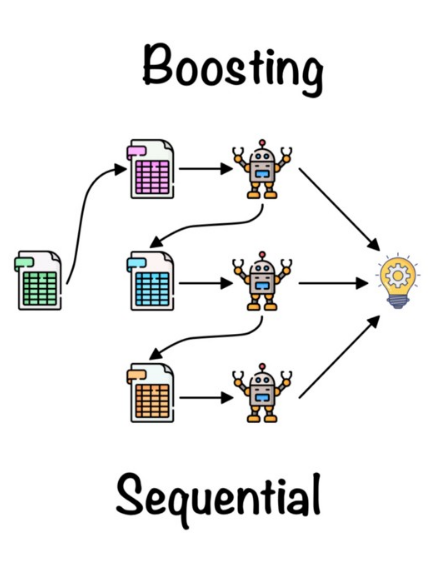

# Boosting
Example flow of the boosting training process:
1. Start with one model (could be a very simple one node tree)
2. Use the first model to make predictions and see how the current error is
3. Train the next tree with the current error as the dependent variable (previous trees remain unchanged during this training)
4. Use all trees built so far to make predictions and see how bad the new current error is
5. Repeat 3 & 4 for the remaining trees

### Illustrative Example : 
> When building a model, one wants to be able to explain the variance in the target variable using the information provided by features. If the first model explains 60% of the variance, there is 40% of variance left to explain. If the second model explains additional 5% of variance from the remaining 40% of variance the first model missed, then these two models together can explain 65% of the variance. Each of them is playing a different role and complementing each other. As more trees are built, the collective prediction power of trees improve and trees together can explain more variance of the target.
>
> The key idea is to set the target outcomes from the previous models to the next model in order to minimize the errors.
> 
> Gradient Boosting algorithms add all the predictions from all the trees to arrive at the final prediction for both regression and for classification

# Important Characteristics of Boosting:
 - The dependent variable varies for each tree
 - The subsequent decision trees are dependent on the previous trees
 - Unlike in Random Forest, increasing the number of trees too much can lead to overfitting problem because the newer trees could be trying to predict intricate patterns in the training data (reduce the number of trees in case there might be overfitting)

# Input Requirement for Gradient Boosting:
 1. A Loss Function to optimize
 2. A weak learner to make prediction (generally decision tree)
 3. An additive model to add weak learners to minimize the loss function
 
### 1. Loss Function
The loss function basically tells how the algorithm models the data set. In simple terms, it is the difference between actual values and predicted values.

**Regression Loss functions**:
- L1 loss or Mean Absolute Errors (MAE)
- L2 Loss or Mean Square Error(MSE)

**Binary Classification Loss Functions**:
- Binary Cross Entropy Loss/Log Loss
    - comparison in each of the predicted probabilities to actual class output (either 0 or 1)
    <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28537%29.png" alt="drawing" width="400"/>, where when the actual class $y_i$ = 1, $1-y_i$ = 0; when the actual class $y_i$ = 0, $1-y_i$ = 1; and the $p$ is the probability of the prediction.
    
- Hinge Loss
    - a measure in incorporating a margin or distance from the classification boundary into the cost calculation.
    - $l(y)=max(0,1−t⋅y)$, where t is the actual outcome (either 0 or 1) and y is the predicted outcome
     <img src="Images/516.png" alt="drawing" width="400"/>
     
### 2. Weak Learner
Weak learners are the models which is used sequentially to reduce the error generated from the previous models and to return a strong model on the end.

- **Decision trees are used as weak learner** in gradient boosting algorithm.

    - It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.

    - This is to **ensure that the learners remain weak, but can still be constructed in a greedy manner**.
    
    - Taking AdaBoost as an example, very short decision trees were used that only had a single split (one node and two leaves), called a decision stump. Larger trees can be used generally with 4-to-8 levels.
    
- For regression, regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.

- As boosting method aims to combine simple models (high bias),  it is good to keep the trees (the weak learners) shallow and simple.

### 3. Additive Model
In gradient boosting, decision trees are added one at a time (in sequence), and existing trees in the model are not changed. 

 - A gradient descent procedure is used to minimize the loss when adding trees.
 > Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

 - Instead of parameters, Gradient Boosting algorithms have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, a tree must be added to the model that reduces the loss (i.e. follow the gradient). This is done by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.
 
 - The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model.

 - A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

# Regularizations for Gradient Boosting Algorithms (XGBoost)

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

There are four common regularization enhancements to basic gradient boosting, namely: tree constraints, shrinkage, random sampling, and penalized learning.

### 1. Tree Constraints
It is important that the weak learners have skill but remain weak.

There are a number of ways that the trees can be constrained.

A good general heuristic is that the more constrained tree creation is, the more trees you will need in the model, and the reverse, where less constrained individual trees, the fewer trees that will be required.

Below are some constraints that can be imposed on the construction of decision trees:

- **Number of trees**, generally adding more trees to the model can be very slow to overfit. The advice is to keep adding trees until no further improvement is observed.

- **Tree depth**, deeper trees are more complex trees and shorter trees are preferred. Generally, better results are seen with 4-8 levels.

- **Number of nodes or number of leaves**, like depth, this can constrain the size of the tree, but is not constrained to a symmetrical structure if other constraints are used.

- **Number of observations per split** imposes a minimum constraint on the amount of training data at a training node before a split can be considered

- **Minimim improvement to loss** is a constraint on the improvement of any split added to a tree.

### 2. Learning Rate
The predictions of each tree are added together sequentially.

The contribution of each tree to this sum can be weighted to slow down the learning by the algorithm. This weighting is called **learning rate**.

learning rate is also known as alpha, shrinkage or step size, which ranges between 0 to 1. If the learning rate is closer to 0, the more careful and slower the training process is. However, a smaller learning rate can help build a more generalisable model. The model will also be less prone to overfitting when growing many trees with smaller learning rates compared to using a higher learning rate. IT provides a configuration trade-off between the learning rate and the number of trees for training.

It is common to have small values in the range of **0.1 to 0.3**, as well as values less than 0.1.

### 3. Random Sampling
Bagging ensembles and random forest allow trees to be greedily created from subsamples of the training dataset.

An insight from this same benefit can be used to reduce the correlation between the trees in the sequence in gradient boosting models.

This variation of boosting is called **stochastic gradient boosting**.

> At each iteration, a subsample of the training data is drawn at random without replacement from the full training dataset. >->
> The randomly selected subsample is then used, instead of the full sample, to fit the base learner.

Typical variants of stochastic boosting:

 - **Subsample rows before creating each tree**
 - **Subsample columns before creating each tree**
 - **Subsample columns before considering each split**

Additionally, aggressive sub-sampling such as **selecting only 50% of the data** has generally shown to be beneficial. Using **column sub-sampling prevents over-fitting even more** so than the traditional row sub-sampling

### 4. Penalized Learning
*Additional constraints** can be imposed on the parameterized trees in addition to their structure.

Classical decision trees like CART are not used as weak learners, instead a modified form called a **regression tree** is used that has numeric values in the leaf nodes. The values in the leaves of the trees can be called weights.

As such, the leaf weight values of the trees can be regularized using popular regularization functions, such as L1 and L2 regularizations of weights.

##### L1 and L2 regularization
> In these two regularization methods, a small amount of biase is introduced when the new fitting line is fitting to the training data. It can greatly reduce the variance. In the other words, the regularization reduces the sensitivity of the target variable on its features.
>
> The key difference between the two regularization is the penalty term. 

##### 1. L1 regularization or Lasso (Least Absolute Shrinkage and Selection Operator) Regression
>
> Lasso regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Instead of minimzing the sum of squared residuals, it minimizes the sum of squared residuals plus the ($\lambda$ x |the slope|), in which $\lambda$ determines how severe the penalty is and |the slope| is the penalty added to the traditional least squares method. (for logistic regression, the sum of squared residuals is replaced by the sum of maximum likelihoods)
>
> The value of $\lambda$ is usually determined by a attempt of a bunch of trial $\lambda$ and using the (10-fold) cross-validation, to discover which one results in the lowest variance.
>
> $\lambda$ can shrink the slope all the way to 0. Therefore, for problems with multiple features, Lasso regression can perform feature selection and eliminate the useless variables! 
>
> Lasso Regression performs better when the data contains a lot of useless variables.

##### 2. L2 regularization or Ridge Regression
>
> Ridge regression adds **"squared magnitude"** of coefficient as penalty term to the loss function. Instead of minimzing the sum of squared residuals, it minimizes the sum of squared residuals plus the ($\lambda$ x the slope$^2$), in which $\lambda$ determines how severe the penalty is and the slope$^2$ is the penalty added to the tradidtional least squares method. 
>
The additional regularization term helps to smooth the final learnt weights to avoid over-fitting. Intuitively, the regularized objective will tend to select a model employing simple and predictive functions.
>
>  $\lambda$ can only shrink the slope asymptotically close to 0 and reduce the contribution of less important features.
>
> Ridge Regression performs better when most variables are useful.

# Evolution of Gradient Boosting

# 1. AdaBoost the First Boosting Algorithm
The first realization of boosting that saw great success in application was **Adaptive Boosting or AdaBoost** for short. 

Beside using the **"weak learners" (almost always stump)** and each stump is made by taking the previous stump's mistake into account,  AdaBoost additionally works by **weighting the samples**, **more weight is given to samples fitted worse in previous steps and less on those already handled well**.

> The three main ideas behind AdaBoost:
<img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28539%29.png" alt="drawing" width="450"/>


### Different sample weighting
Assume the weights of each sample is intially the same.

**Total error for a stump** is the sum of the weights associated with the incorrectly classified samples, i.e., 
> \# of incorrectly classified samples in the stump / total \# of samples in the stump

Then use the **total error** to determine the **amount of say** that stump has in the final classification by the formula: 
> Amount of Say = $\frac{1}{2} log(\frac{1 - Total Error}{Total Error})$
>
> Relationship between amount of say and total error: <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28538%29.png" alt="drawing" width="250"/>
>
> If the total error is roughly 0.5, the amount of say is close to 0. 
> If the total error decreases from 0.5 to 0, the amount of say becomes postively larger. Oppositely, if the total error increases from 0.5 to 1, the amount of say becomes negatively larger.

After calculating the amount of say, the **new sample weights** can be found with the formula:
> New Sample Weight for misclassified samples = Sample Weight x $e^{Amount of Say}$ (larger amount of say gives larger sample weight)
>
> New Sample Weight for correctly classified samples = Sample Weight x $ e^{-Amount of Say}$ (larger amount of say gives smaller sample weight)

**Normalize these new sample weights** by dividing them with their sum, such that their new sum of weight is equal to 1.

Next, use the modified sample weights to **make the second stump** in the forest. There are two ways to do so.

> i. **Weighted Gini Index**
>
> The sample weights can be used to calculate the **weighted Gini indexes** to determine which feature should split the next stump. The weighted Gini index would put more emphasis on correctly classifying the misclassified sample in the last stump, since it has the largest sample weight. 
>
> Split the feature which has the lowest weighted Gini index and calculate the sample weights for each sample again.
> 
> ii. **Creating a New Collection of Samples**
> 
> Create a empty dataset which is the same size as the original. Then, randomly select the samples based their sample weights as a probability, until the filling the empty dataset. The sample with larger weight would be added repeatly in this new dataset and the original dataset can be dropped.
>
> For the new dataset, give all samples a new equal sample weights again. The repeated samples act like a block and create a large penalty for being misclassified.
>
> Lastly, go back to the beginning and find the stump that does the best job classifying the new collection of samples.

The model keeps building stumps until it has created the required number of trees or additional trees failed to improve the fit

### Prediction by AdaBoost
- Add up the amount of say for the stumps in each classification category
- The classification catergory with the largest total amount of say is made as the result for the problem

<img src="Images/螢幕擷取畫面 (544).png" alt="drawing" width="500"/>

# 2. Gradient Boost
The working mechanism is similar to AdaBoost. Gradient Boost builds fixed sized trees that is based on the errors made by the previous trees. 

The main difference is that **Gradient Boost starts by making a single leaf and the tree is usually larger than a stump**, but AdaBoost starts by building a very small tree (stump). This single leaf represents the **initial guess for target values of each sample**. Gradient Boost also scales trees as AdaBoost does but it scales them by the same amount (with the same learning rate).

Usually for Gradient Boost, the maximum number of leaf nodes is set at between 8 to 32. The values of each leaf node are the (pseudo) residuals of the actual values in the training dataset. For leaf nodes having more than one residuals, their residuals are simply the average value of the residuals within themselves.

> The main idea behind Gradient Boost: 
>
> 1. Start with a leaf that is the average values of the target variable
>
> 2. Add a tree based on the residuals, the difference between the actual and predicted values, and scale the tree's contribution to the final prediction with a learning rate
> 
> 3. Keep adding trees based on the errors made by the previous tree <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28541%29.png" alt="drawing" width="450"/>

# 2.1 Gradient Boost (Regression)
Residual is an important term in the use of Gradient Boost for regression problems.

### (Pseudo) Residual
The term (pseudo) residual comes from Linear Regression, where it is the difference between the actual value and predicted value. The "pseudo" part of the pseudal residual is a reminder that it is doing Gradient Boost but not Linear Regression.

All features are used to predict the **residuals** instead of the total errors or the sample weights as so in AdaBoost.

The **initial guess of the predicted residuals** is simply the **actual value minus the average value**.

The new predicted value would be the **originally predicted value added with the residual scaled by the learning rate**. Repeat this for all other samples in the training dataset. 

> Loss function = $\sum{L(y_i,p_i)} = \frac{1}{2}(y_i - p_i)^2$, where $y_i$ is the i th actual value and $p_i$ is the i th predicted value. 
>
> If without the learning rate, the model would fit the training data too well causing low biase and probably very high variance. Therefore, learning rate is used to scale the contribution from the new tree. In addition, the scaling by learning rate results in a **small step in the right direction** (the more accurate direction).

The next residual for the next tree will be the difference between the actual value and the predicted value, in which the predicted value is the sum of the first predicted value and the followed predicted value calculated from the first residual: <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28540%29.png" alt="drawing" width="450"/>

Each time when a tree is added to the prediction, the residuals become smaller. The trees are added until reaching the maximum number of tree specified or adding additional trees does not significantly reduce the size of the residuals. Taking a lot of small steps in the right direction results in better predictions with a testing dataset, i.e. lower variance. 

# 2.2 Gradient Boost (Classification)
Just like the regression, Gradient Boost for Classification also starts by an initial prediction. The rationale behind the prediction is similar too. 

The main difference is that the initial prediction for the target variable of each sample is the **ln(odds)** instead of a pseudo residual. 

### Logistic Function and Probability Transformation
Odds (more technically the odds of success) is defined as probability of success divided by the probability of failure

> $ln(odds) = ln{\frac{p}{1-p}}$ , where p is the probability of success

Then, this initial prediction is converted to a probability by a **logistic function** from Logistic Regression.

> Logistic Function = $\frac{exp{ [ln(odds)]}}{1+exp{ [ln(odds)]}}$

If this probability of a classification category is larger than 0.5, in which 0.5 is a commnon threshold for making classification decisions based on probability, this samples in the training dataset can be determined as that classification category. 

To measure how bad the initial prediction is, **pseudo residuals** are calculated as the difference between actual and predicted values. 

> Like Logistic Regression, for binary classification, the values for the two classification categories are 1 and 0. Then, calculate the residuals for all samples by 1 or 0 minus the initial prediction probability

As the prediction is in $ln(odds)$ and the lead is derived from probability, the leaf samples cannot be directly added up to take average as a new $ln(odds)$ prediction without a transforamtion. 

> The transformation before adding up the $ln(odds)$ for the output value of leaf nodes having more than one sample: $\frac{\sum {Residuals}_i}{\sum [Previous Probability_i \times (1 - Previous Probability_i)]}$, an example is as followed: <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28542%29.png" alt="drawing" width="450"/>, where for the first tree, the previous probability is simply the initial guess (in this case it is 0.7).
>
> Note that the same as the regression, the maximum number of leaf nodes is also set at between 8 and 32.
>
>> ### Relationship between $p$ and $ln(odds)$
>>
>> From the log loss function $- \sum_{i=1}^{N} [y_i ln(p) + (1 - y_i) ln(1-p)]$ with N = i,
>>
>> $ -  [y_i ln(p) + (1 - y_i) ln(1-p)] = - y_i ln(odds) + ln[1 + exp(ln(odds))]$

The new $\ln(odds)$ prediction would be the **previous prediction plus the output value from the tree scaled by learning rate**. <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28543%29.png" alt="drawing" width="450"/>

This new prediction is further converted into a probability by the logistic function. It will output a new predicted probability. If this probability of a classification category is larger than 0.5, in which 0.5 is a commnon threshold for making classification decisions based on probability, this sample can be determined as that classification category.

Repeat this procedure for all other samples in the training dataset. 

### Prediction by Gradient Boost
For predicting a new sample, the model will start with the initial prediction, then adding the scaled value from the first tree, the second trees, ..., and make the prediction (just like the figure above).


# 3. XGBoost

XGBoost stands for eXtreme Gradient Boosting. It aims at an engineering goal to push the limit of computations resources in terms of execution speed and model performance for boosted tree algorithms. XGBoost used a more regularized model formalization to control over-fitting, which boosts the performance of a regular gradient boosting model. 

In addition to the original Gradient Boost algorithm, it supports two more features:
- **Stochastic Gradient Boosting** with sub-sampling at the row, column and column per split levels
- **Regularized Gradient Boosting** with both L1 and L2 regularization

Note that there are several ways to build XGBoost trees. The following examples are just the most common way to build the trees for regression and classification, with reference to StatQuest. Moreover, XGBoost was designed to be used **for large and complex datasets**.

# 3.1 XGBoost (Regression)

### Initial Prediction
The initial prediction of XGBoost can be anything, but by default the common practice is 0.5, regardless of a regression or classfication problem. The residual, again the difference between the actual and predicted values, show how good/bad the initial prediction is.

In the example used below, the tree having a two layer of depth is only for a handy example illustration. By default, XGBoost is allowed to have up to 6 levels.

### Similarity Score and Gain
#### 1. Each XGBoost tree starts with a single leaf, which contains all residuals

#### 2. Calculate **Similarity Score**

Similarity Score = $\frac{(\sum{Residuals})^2}{Number of Residuals + \lambda}$
, where $\lambda$ is a regularization paramter. When it is larger than 0, it results in more pruning, by shrinking the the Similarity Score (and results in smaller OutPut Values for the leaves). When it is equal to 0, there is no regularization. This value is generally used to prevent overfitting the training dataset.
> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28546%29.png" alt="drawing" width="450"/>
> 
> In this example, the Similarity Score for the Residuals in the root is 4. 

Then, cluster similar Residuals in the root by spliting them into two groups with different thresholds. Calculate their Similarity Scores for each node and 

> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28547%29.png" alt="drawing" width="450"/>
>
> When the residuals cancel out, the Similarity Score is relatively small; when the residuals are similar or there is just only one of them, the Similarity Score is relatively large. 
>
>> **Cover is defined as the denominator of Similarity Score minus $\lambda$**, i.e. number of residuals in the leave for regression
>>
>> When XGBoost for regression, it is allowed to have as few as 1 residual per leaf. Therefore, using the default minimum value for Cover has no effect in growing the tree.

#### 3. Calculate Gain of splitting the residuals into two groups 

Gain = $Left_{Similarity} + Right_{Similiarity} - Root_{Simliarity}$

> In the above figure, the Gain for the threshold "Dosage < 15" is: 110.25 + 14.08 - 4 = 120.33.

### Find the Best Splitting Node according to the largest Gain
Then, re-do Step 2 and Step 3 for other possible thresholds. The threshold which has the **largest Gain** will be best at splitting the residuals into clusters of similar values.

After finding the best split for the initial split, find the next best splitting nodes from each threshold just like Step 2 and 3, until reached the required maximum depth or there is no more to split.

> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28548%29.png" alt="drawing" width="200"/> 

### Prune the Tree by calculating the difference between the Gain value and a user defined Tree Complex Parameter ($\gamma$)
Calculate the difference between the Gain value from the lowest branch of the tree and the **Tree Complex Parameter $\gamma$**: (Gain - $\gamma$)


If the difference is postive, no need to prune the tree.
   - The bottom picture illustrates the idea of when there is a positive difference 
    
> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28549%29.png" alt="drawing" width="300"/> 

If the difference is negative, prune the tree by removing that branch. Then, subtract the next Gain value and work the pruning up the tree until the difference becomes a positive number.
   - Even though the upper branch has a negative difference, it does not affect the tree if the lower branch has a positive difference

Increase the value of $\gamma$ would make pruning to happen easier.
   - Setting the $\gamma$ as zero does not turn off pruning because the Gain can be a negative value on its own
    


### Calculate Output Value of the Remaining Leaves
To determine the Output Values of the leaves, this is the Output Value equation: $\frac{Sum of Residuals}{Number of Residuals + \lambda}$

The equation is very similar to that for Similarity Score, except that there is no squared after summing up the residuals. The below picture shows the example calculation of a simple tree, with an assumption of a zero-valued $\lambda$. The Output Values are then simply the averaged values within the leaves

> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28550%29.png" alt="drawing" width="300"/> 

### Carry a prediction with the tree(s) and build the next tree
After calculating all Output Values for the first tree, the prediction is performed by adding the initial prediction and the output of the tree scaled with a learning rate. In XGBoost, the learning rate is called as $\eta$ (eta) with a default value 0.3.

The exmaple below shows how to fit the data point into the tree and return a Output Value. This value is scaled with a learning rate and added with the initial prediction to give the final prediction. New residuals can be calculated from this prediction and used for building the next tree, following the flow from calculating the Similarity Score to the Output Value.

> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28551%29.png" alt="drawing" width="450"/> 



# 3.2 XGBoost (Classification)


### Initial Prediction
In XGBoost classification, all target variables are categorical. The initial prediction is the same as that of regression (0.5). Similar to Gradient Boost, the samples are distributed into a logistic functions and then calculate the residuals like below:

> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28552%29.png" alt="drawing" width="450"/> 


### The steps for Similarity Score and Gain, Finding the Best Splitting Nodes, and Pruning are the same as the regression, except that the Similarity Score is calculated as:

Similiarity Score for classification = $\frac{(\sum{Residuals_i})^2}{\sum{[Previous Probability_i \times (1 - Previous Probability_i)] + \lambda}}$

The **numerator** for classification is the same as that for regression. The denominator is similar to the transformation equation of Gradient Boost for classification, but added with a $\lambda$

Similarly, the calculation for Cover is also changed as: Cover = $\sum{[Previous Probability_i \times (1 - Previous Probability_i)]}$.

It is used to determine the minimum number of residuals in each leaf. Any node with a Cover value less than the **min_child_weight** (default: minimum Cover = 1) will be removed.

The below example shows the Cover for a leaf is 0.5 less than the default min_child_weight, its node is removed from the tree.
> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28553%29.png" alt="drawing" width="450"/> 
> Setting min_child_weight to be 0 in this example can prevent XGBoost removing all nodes in the tree

### Calculate Output Value of the Remaining Leaves
Output Values for a leave in classification: $\frac{(\sum{Residuals_i})}{\sum{[Previous Probability_i \times (1 - Previous Probability_i)] + \lambda}}$

The below example shows the calculation of the Output Value of a leaf with zero-assumed $\lambda$
> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28554%29.png" alt="drawing" width="450"/> 

### Carry a prediction with the tree(s) 
After calculating all Output Values for the first tree, the new prediction is performed by adding the initial prediction and the output of the tree scaled with a learning rate. However like Gradient Boost for classification, the probability of the initial prediction should be converted to a log(odds) value before added with the Output Values, with the formula: 

$\log{(odds)} = \log{\frac{p}{1-p}}$

Same as the regression, the learning rate is called as  𝜂  (eta) with a default value 0.3.

Below an example shows a sample with Dosage of 3 mg being predicted on its effectiveness, and to calculate the log(odds) prediction.
> <img src="Images/%E8%9E%A2%E5%B9%95%E6%93%B7%E5%8F%96%E7%95%AB%E9%9D%A2%20%28555%29.png" alt="drawing" width="450"/>
> Although the term log(odds) for initial predition is 0, it is only the case if it is equal to 0.5.

After calculated the log(odds) prediction, convert it back into a probability by the Logistic Function: 

Probability = $\frac{e^{\log(odds)}}{1 + e^{\log(odds)}}$

Check if the new residual becomes smaller!

### Build the next tree
After built up the first tree, the previous probability for the second tree changes. Therefore, the calculation for Similarity Score and Output Value no longer use the initial probability as well, but containing a mixture of previously predicted probabilities.

Then, keep building tree until the residuals become super small or reached the maximum number of trees.

> ### Difference between AdaBoost and Gradient Boost
>
> AdaBoost | Gradient Boost | XGBoost 
-------- | -------------- | -------
This method focuses on training upon **misclassified observations**. Alters the distribution of the training dataset to **increase weights on sample observations that are difficult to classify**. | It trains learners based upon **minimising the loss function of a learner** (i.e., training on the residuals of the model) | Original **Gradient Boosting** can be regularized with both **L1 and L2 regularization**
An additive model where shortingcomings of previous models are identified by **high-weight data points** | An additive model where shortcomings of previous model are identified by the **gradient** | **Parallel processing** implementation during the construction of each tree is much faster than GB
Trees are usually grown as **stumps** | Trees are usually grown to a greater **depth ranging from 8 to 32 terminal nodes** | Trees are allowed to have **up to 6 levels** (64 nodes) by default
Each classifier has **different weights** assigned to the final prediction. The final prediction is based on a **majority vote** of the weak learners’ predictions weighted by their individual accuracy. | All classifiers are **weighted equally** and their predictive capacity is limited by **learning rate**. The final prediction is based on the **summation of all models** | It makes spliting up to the max_depth specified and then starts **pruning** the tree backwards and removes splits beyond which there is no positive gain.
Weights are given to both the classifiers and observations thus capturing maximum variance within data | Trees are built on previous classifier's residuals thus capturing variance in data | 


# Hyperparameters for XGBoost:

### Important hyperparameters of LightGBM and CatBoost are put into this table too
>
> **Functions** | **XGBoost** | **LightGBM** | **CatBoost**
-------- | -------- | -------------- | -------
**Hyperparameters controlling overfitting** | learning_rate, max_depth, min_child_weight | learning_rate, max_depth, num_leaves, min_data_in_leaf | learning_rate, depth, l2_reg
**Hyperparameters controlling speed** | colsample_bytree, subsample, n_estimators | feature_fraction, bagging_fraction, num_iterations | rsm, iteration